In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset Overview

In [3]:
#import data 
df = pd.read_csv("../data/raw/data.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.shape

(95662, 16)

In [5]:
df.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

### Missing Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

<Axes: >

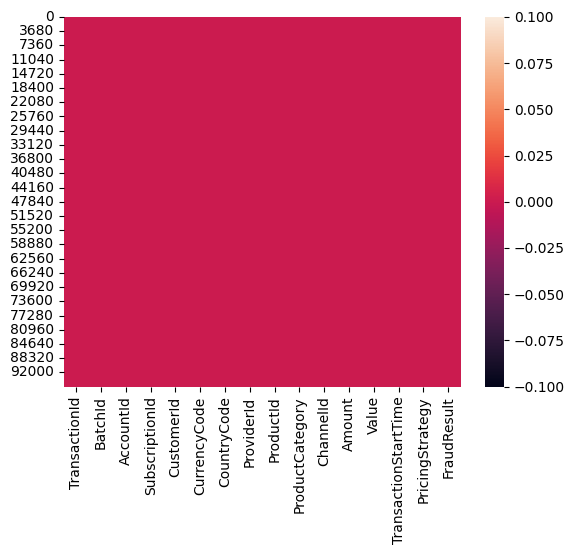

In [7]:
sns.heatmap(df.isnull())

### Summary Stats for Numerical features

In [8]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


<Axes: >

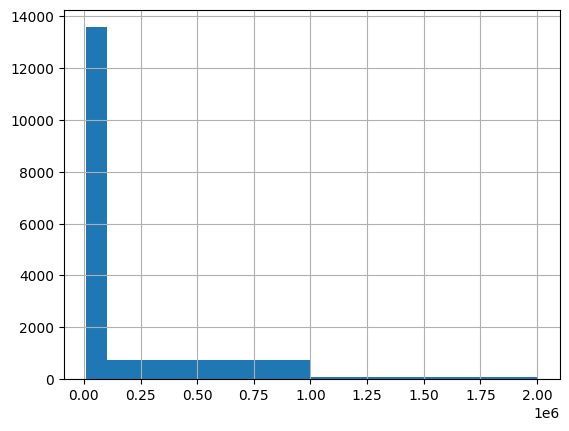

In [17]:
#histograms
df["Amount"].hist(bins=[10000,100000,1000000,2000000])
# sns.kdeplot(df["Value"], fill=True)

In [53]:
print(len(df["Amount"].unique()))
print(df["Amount"].value_counts().sort_values(ascending=False).iloc[:10])
df["Amount"].value_counts().sort_values(ascending=False).iloc[0:100].sum()

#Out to 1,676 unique values in "Amount" column, only 100 unique value appeared 90,177 times out of 95,662 

1676
Amount
 1000.0     17091
-50.0        8513
 10000.0     8260
 2000.0      5489
 500.0       5246
-5000.0      5110
 5000.0      4595
-20.0        2608
-100.0       2405
-1000.0      2345
Name: count, dtype: int64


np.int64(90177)

<Axes: xlabel='Amount'>

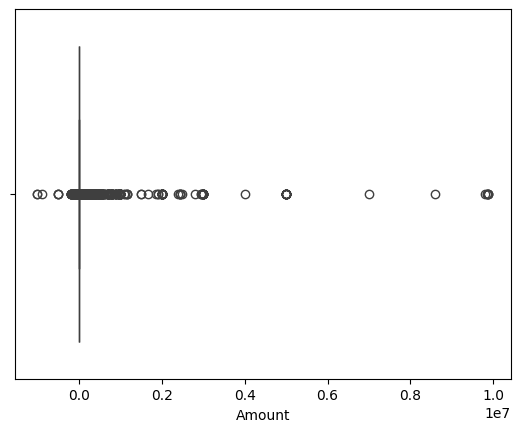

In [20]:
sns.boxplot(data=df, x=df["Amount"])

### Categorical Feature Distribution

['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


<Axes: xlabel='ProductCategory'>

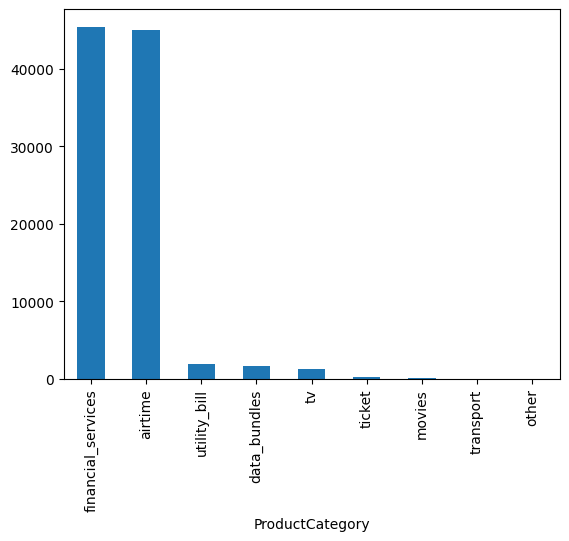

In [54]:
print(df["ProductCategory"].unique())
print(df["ProductCategory"].value_counts())
df["ProductCategory"].value_counts().plot(kind="bar")

['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


<Axes: xlabel='ChannelId'>

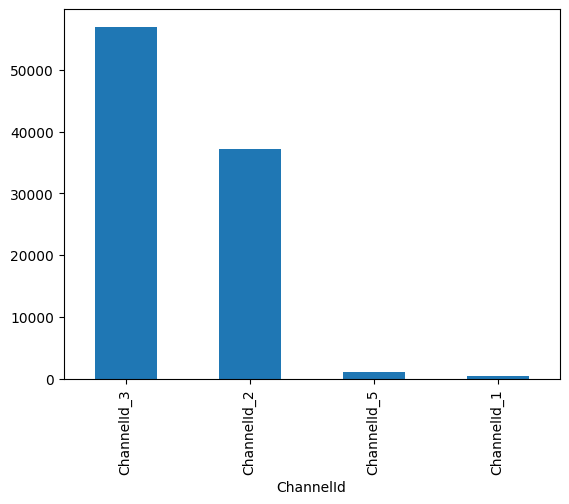

In [46]:
print(df["ChannelId"].unique())
print(df["ChannelId"].value_counts())
df["ChannelId"].value_counts().plot(kind="bar")

In [48]:
print(df["CountryCode"].unique())

[256]


FraudResult
0    95469
1      193
Name: count, dtype: int64


<Axes: xlabel='FraudResult'>

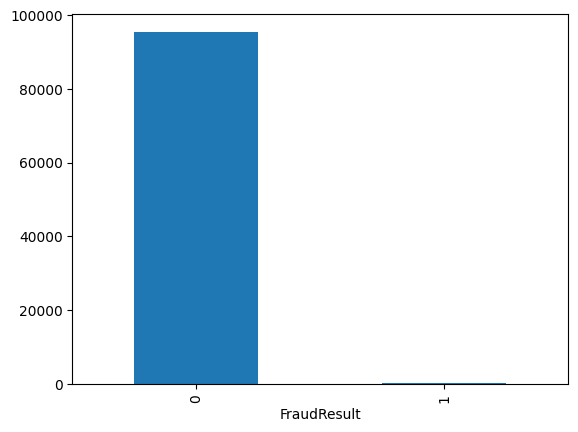

In [49]:
print(df["FraudResult"].value_counts())
df["FraudResult"].value_counts().plot(kind="bar")

### Temporal Features

<Axes: xlabel='Day'>

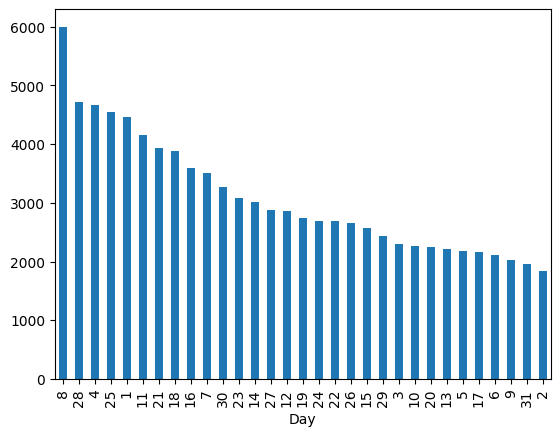

In [51]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])
df["Day"] = df["TransactionStartTime"].dt.day
df["Day"].value_counts().sort_values(ascending=False).plot(kind="bar")

### Correlation

<Axes: >

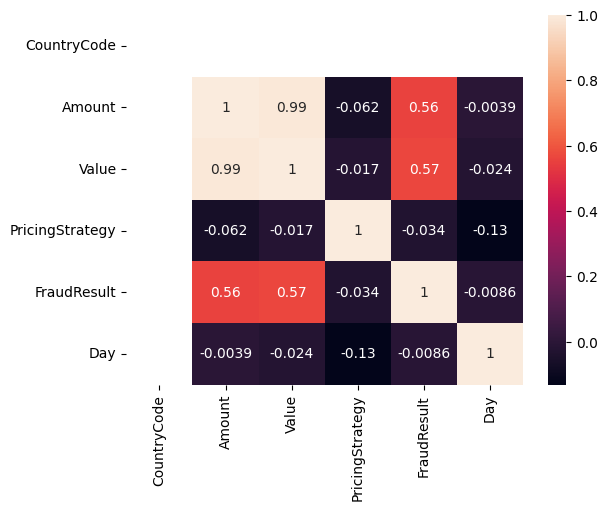

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Key Insights

- **Dataset Overview**: The dataset contains **95,662 rows** and **16 columns**. Most data types are correctly inferred, except for `TransactionStartTime`, which was converted to `datetime`.

- **Missing Values**: There are **no missing values** in the dataset.

- **Amount Feature Analysis**:
  - The `Amount` column has a **minimum value of -1,000,000**, a **maximum of 9,880,000**, and a **mean of 6,717.85**.
  - Although there are **1,676 unique values**, the **top 100 most frequent values** account for **over 94%** of the data (90,177 transactions).
  - **Right-Skewed** feature.
  - The **10 most frequent transaction amounts** are:

    | Amount   | Frequency |
    |----------|-----------|
    | 1000.0   | 17,091    |
    | -50.0    | 8,513     |
    | 10000.0  | 8,260     |
    | 2000.0   | 5,489     |
    | 500.0    | 5,246     |
    | -5000.0  | 5,110     |
    | 5000.0   | 4,595     |
    | -20.0    | 2,608     |
    | -100.0   | 2,405     |
    | -1000.0  | 2,345     |

- **Categorical Features**:
  - `ProductCategory` contains **9 unique categories**, with **`financial_services` (45,405)** and **`airtime` (45,027)** dominating the dataset.
  - `ChannelId` includes **4 unique values**, with **ChannelId_3** and **ChannelId_2** accounting for over **98%** of transactions.
  - All transactions are from a **single country**: `CountryCode 256`.

- **Fraud Insights**: 
  - Only **193 transactions** are labeled as fraudulent, indicating **class imbalance**.
  
- **Correlation Analysis**:
  - `Amount` and `Value` are **highly correlated** (**0.99**), suggesting redundancy.
  - `FraudResult` has a **moderate positive correlation** with `Amount` (**0.56**) and `Value` (**0.57**).
  - Other numerical features show **very weak or negligible correlations**, often close to **0 or slightly negative**.

